<a href="https://colab.research.google.com/github/Kidjin04/Test-repo/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def insertionSort(A):
  for i in range(1, len(a)):
    loc = i-1
    newItem = A[i]
    while loc >= 0 and newItem < A[loc]:
      A[loc+1] = A[loc]
      loc -= 1
    A[loc+1] = newItem

In [ ]:
def selectionSort(A):
    for i in range(len(A)):
        min_idx = i
        for j in range(i+1, len(A)):
            if A[min_idx] > A[j]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i]

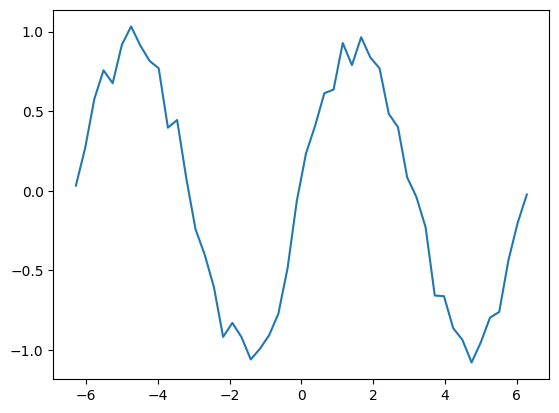

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)         # -2파이 에서 -2파이까지
sin_data = np.sin(x_data)  + 0.1*np.random.randn(len(x_data))        #sin() 함수에 난수로 노이즈를 더한다.

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10         #시계열의 수
n_sample = len(x_data)-n_rnn           #샘플수
x = np.zeros((n_sample, n_rnn))          #입력
t = np.zeros((n_sample, n_rnn))         # 정답
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]

In [5]:
t[i] = sin_data[i+1:i+n_rnn+1]   #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1)    #keras에서의 RNN에서는 입력을 (샘플 수, 시계열의 수, 입력층의 뉴련 수)로 한다
print(x.shape)
t=t.reshape(n_sample, n_rnn, 1)       #이번은 입력과 같은 형태
print(t.shape)

(40, 10, 1)
(40, 10, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

n_in = 1          # 입력층의 뉴련 수
n_mid = 20        # 중간층의 뉴런 수
n_out = 1         # 출력층의 뉴련 수

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in),return_sequences=True))    # 간단한 RNN층
model.add(Dense(n_out, activation="linear"))                                    # 전결합층
model.compile(loss="mean_squared_error", optimizer="sgd")                       # 오차는 제곱오차, 최적화 알고리즘은 SGD
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10, 20)            440       
                                                                 
 dense_3 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(x, t, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 5s 73ms/step - loss: 0.0427 - val_loss: 0.2144
Epoch 2/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0152 - val_loss: 0.1772
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.1627
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.1559
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0054 - val_loss: 0.1520
Epoch 6/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.1490
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0048 - val_loss: 0.1478
Epoch 8/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.1475
Epoch 9/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.1469
Epoch 10/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0043 - val_loss: 0.1468
Epoch 11/20
5/5 [============

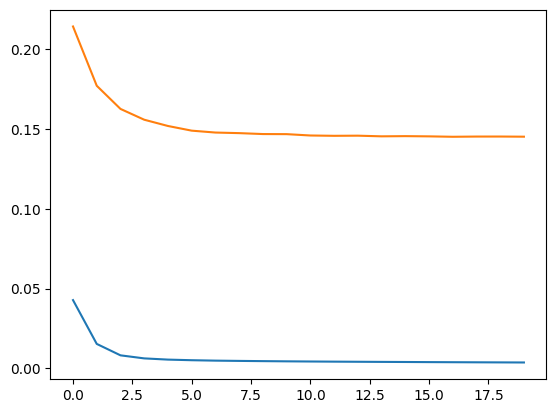

In [14]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)),vloss)
plt.show()

1/1 [==============================] - 0s 20ms/step


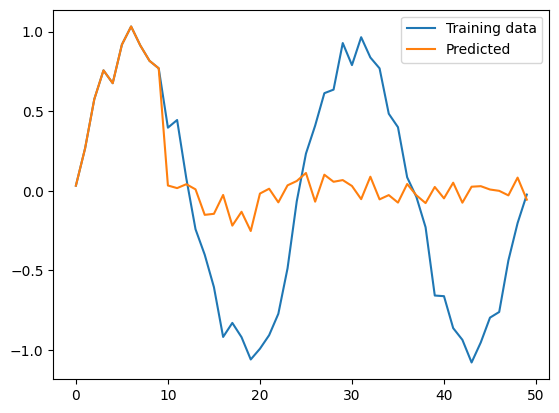

In [16]:
predicted = x[0].reshape(-1)    #처음의 입력, reshape(-1)으로 1차웡의 벡터로 한다

for i in range(0, n_sample):
  y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))     #최근 데이터를 사용해서 예측을 실시한다
  predicted = np.append(predicted, y[0][n_rnn-1][0])             #출력의 최후 결과를 predicted에 추가한다

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")    #훈련에 사용한 데이터
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")      #예측 결과
plt.legend()
plt.show()

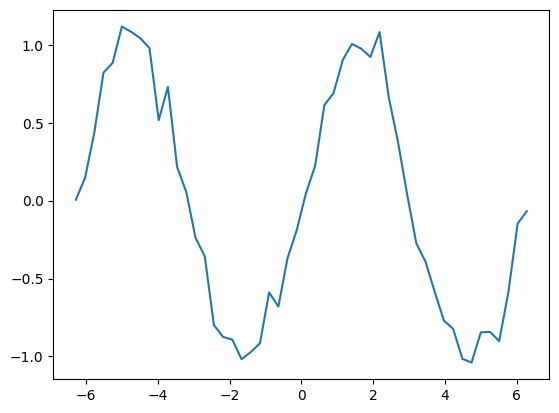

(40, 10, 1)
(40, 10, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10, 20)            440       
                                                                 
 dense_3 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)         # -2파이 에서 -2파이까지
sin_data = np.sin(x_data)  + 0.1*np.random.randn(len(x_data))        #sin() 함수에 난수로 노이즈를 더한다.

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10         #시계열의 수
n_sample = len(x_data)-n_rnn           #샘플수
x = np.zeros((n_sample, n_rnn))          #입력
t = np.zeros((n_sample, n_rnn))         # 정답
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]   #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1)    #샘플 수, 시계열의 수, 입력층의 뉴런 수
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)    #이번은 입력과 같은 형태
print(t.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

n_in = 1          # 입력층의 뉴련 수
n_mid = 20        # 중간층의 뉴런 수
n_out = 1         # 출력층의 뉴련 수

model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in),return_sequences=True))  # 간단한 RNN층
model_rnn.add(Dense(n_out, activation="linear"))                                    # 전결합층
model_rnn.compile(loss="mean_squared_error", optimizer="sgd")                       # 오차는 제곱오차, 최적화 알고리즘은 SGD
print(model_rnn.summary())

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTN

n_in = 1          # 입력층의 뉴련 수
n_mid = 20        # 중간층의 뉴런 수
n_out = 1         # 출력층의 뉴련 수

model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in),return_sequences=True)) 
model_rnn.add(Dense(n_out, activation="linear"))                                  
model_rnn.compile(loss="mean_squared_error", optimizer="sgd")   

print(model_rnn.summary())

ImportError: ignored

In [20]:
# LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_lstm.add(Dense(n_out, activation="linear"))
model_lstm.compile(loss="mean_squared_error",optimizer="sgd")
print(model_lstm.summary)

NameError: ignored

In [11]:
import time
epochs = 500
batch_size = 8

start_time = time. time()
history.rnn = model_rnn.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("학습 시간 --일반적인 RNN--:", time.time() - start_time)

#LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("학습 시간 --LSTM--:", time.time() - start_time)

NameError: ignored